In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA


In [2]:
# Load the dataset
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
# Display columns and first few rows
print("Wholesale Customers Dataset Columns:")
print(data.columns)
print("\nFirst few rows:")
print(data.head())
print("\nDataset statistics:")
print(data.describe())

Wholesale Customers Dataset Columns:
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

First few rows:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Dataset statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000

In [4]:
# Select features for clustering
X = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [5]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

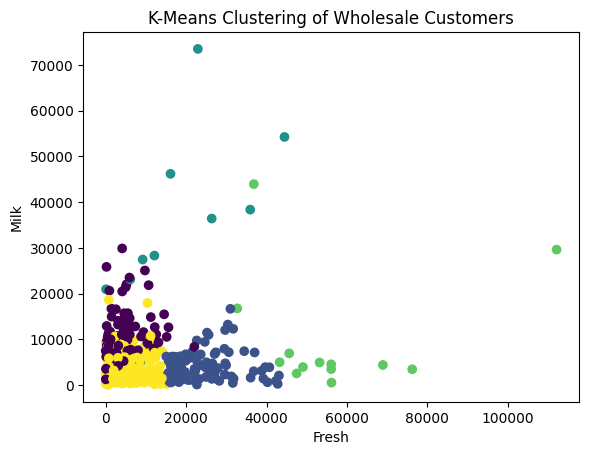

In [7]:
# Visualize the resulting clusters
plt.scatter(X['Fresh'], X['Milk'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('K-Means Clustering of Wholesale Customers')
plt.show()

In [8]:
# Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

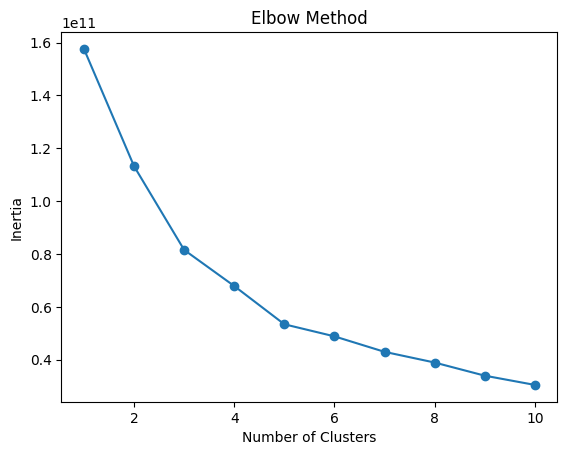

In [9]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [10]:
# Silhouette Score
silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

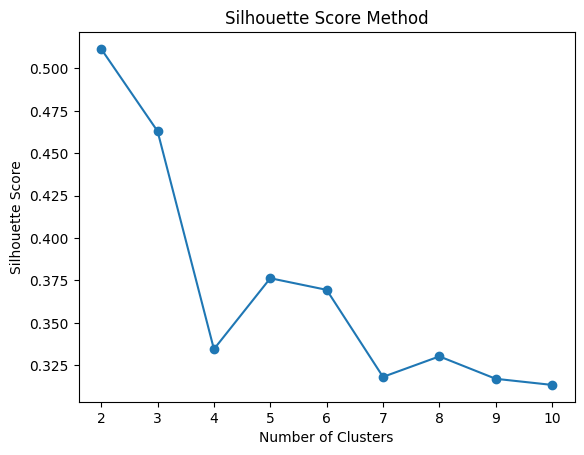

In [11]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [12]:
# Describe each cluster for numeric columns only
cluster_profile = data.groupby('Cluster').mean()
print("\nCluster Profiling:")
print(cluster_profile)


Cluster Profiling:
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.883721  2.500000   4556.069767  11005.500000  17461.872093   
1        1.216981  2.594340  23710.849057   3882.056604   5169.311321   
2        2.000000  2.500000  18192.400000  35361.600000  48052.200000   
3        1.000000  2.461538  56453.307692  10026.230769   8739.000000   
4        1.146667  2.542222   6485.075556   3148.573333   3798.955556   

               Frozen  Detergents_Paper   Delicassen  
Cluster                                               
0         1388.465116       7559.616279  1531.081395  
1         3772.443396       1118.264151  1693.103774  
2         3308.400000      23534.900000  4461.100000  
3        15518.076923       1258.230769  7170.538462  
4         2655.751111       1099.946667   986.546667  


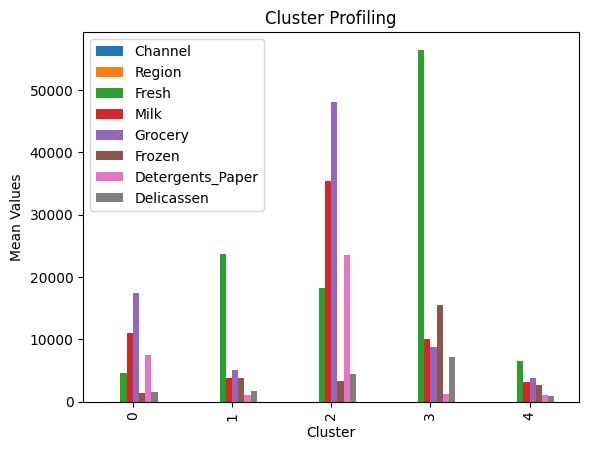

In [13]:
# Visualize cluster profiling
cluster_profile.plot(kind='bar')
plt.title('Cluster Profiling')
plt.xlabel('Cluster')
plt.ylabel('Mean Values')
plt.show()

In [14]:
# Hierarchical clustering
linked = linkage(X, method='ward')

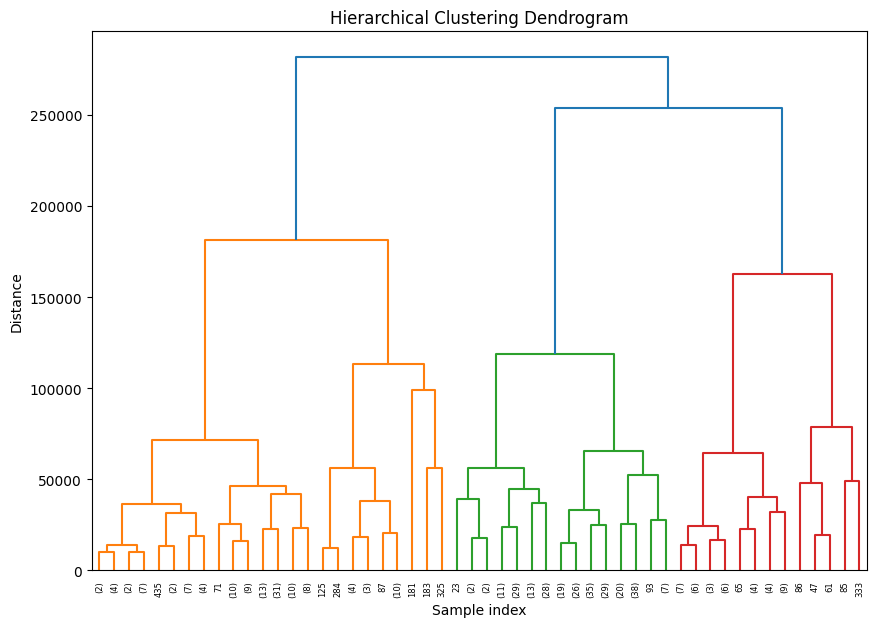

In [15]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [16]:
# Cut the dendrogram to form flat clusters
data['HCluster'] = fcluster(linked, t=5, criterion='maxclust')

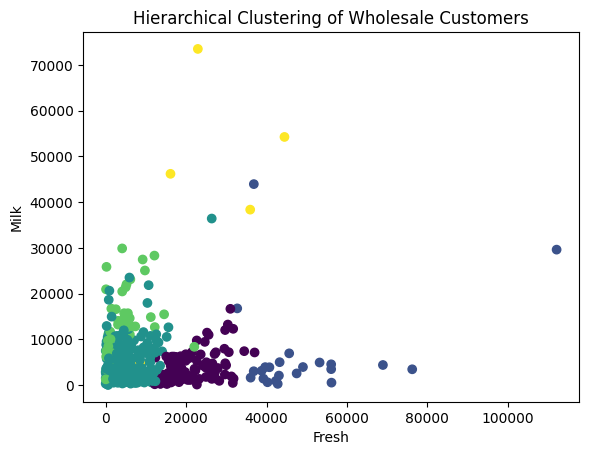

In [18]:
# Compare clusters
plt.scatter(X['Fresh'], X['Milk'], c=data['HCluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Hierarchical Clustering of Wholesale Customers')
plt.show()

In [19]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

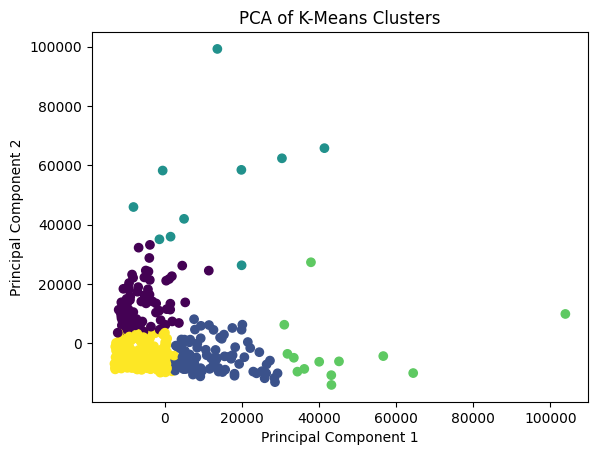

In [20]:
# Visualize K-Means clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of K-Means Clusters')
plt.show()

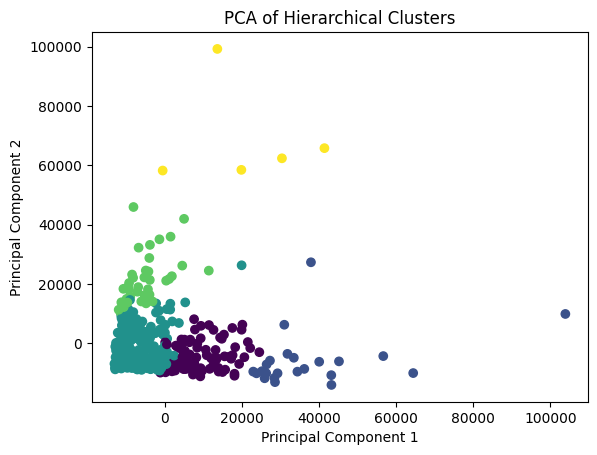

In [21]:
# Visualize Hierarchical clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['HCluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Hierarchical Clusters')
plt.show()